In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [37]:
train_df = pd.read_csv("train_dev_data/train_set.csv").dropna()
dev_df = pd.read_csv("train_dev_data/dev_set.csv").dropna()
X_train = train_df['text']
y_train = train_df['label']
X_test = dev_df['text']
y_test = dev_df['label']

In [ ]:
# Convert text data into numerical features using TfidfVectorizer
vectorizer = N(stop_words='english', max_features=5000)  # Limit to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_tfidf)

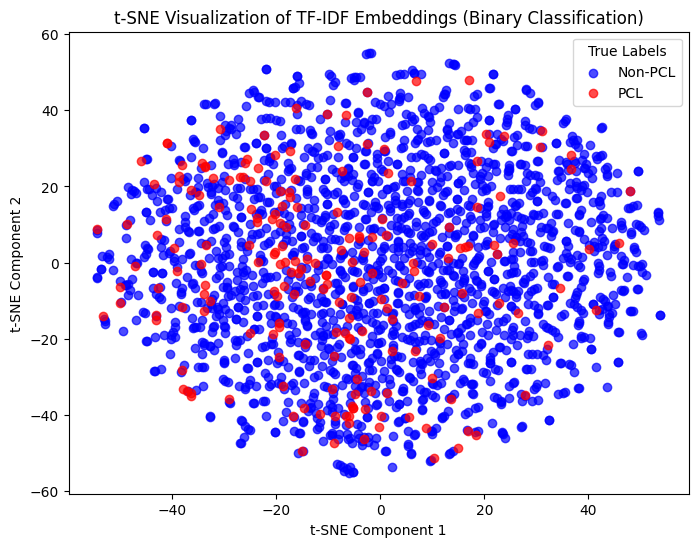

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Convert sparse TF-IDF matrix to dense
X_test_dense = X_test_tfidf.toarray()

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_test_dense)

# Define class labels and corresponding colors
class_labels = {0: "Non-PCL", 1: "PCL"}
class_colors = {0: "blue", 1: "red"}

# Create scatter plot
plt.figure(figsize=(8, 6))

for class_label in class_labels:
    plt.scatter(X_tsne[y_test == class_label, 0], 
                X_tsne[y_test == class_label, 1], 
                color=class_colors[class_label], 
                label=class_labels[class_label], 
                alpha=0.7)

# Add legend instead of color bar
plt.legend(title="True Labels")

# Labels and title
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of TF-IDF Embeddings (Binary Classification)")

plt.show()


In [51]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefficients = logreg_model.coef_[0]

# Top positive and negative coefficients
top_positive_coefficients = np.argsort(coefficients)[-10:]
top_negative_coefficients = np.argsort(coefficients)[:10]

print("Top PCL indicators:")
for i in top_positive_coefficients:
    print(feature_names[i], coefficients[i])

print("\nTop Non-PCL indicators:")
for i in top_negative_coefficients:
    print(feature_names[i], coefficients[i])

Top PCL indicators:
poverty 3.2837697946420996
need 3.3443270980842725
christmas 3.580838281315047
homeless 3.703980126192148
help 3.7062155357491844
poor 3.7422970888577907
hungry 3.7792652984844763
lives 4.198330773082963
life 4.31524353447165
hope 4.695113542053523

Top Non-PCL indicators:
immigrant -2.5241183531336997
hopelessly -2.396949868726537
immigrants -2.298293227960904
workers -2.1378268213287006
public -1.8062269984284398
number -1.7605810813282476
police -1.715793605007918
fund -1.7006819848254588
illegal -1.6789797741522472
left -1.6695692956708816


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1894
           1       0.29      0.54      0.38       199

    accuracy                           0.83      2093
   macro avg       0.62      0.70      0.64      2093
weighted avg       0.88      0.83      0.85      2093

Confusion Matrix:
[[1632  262]
 [  92  107]]


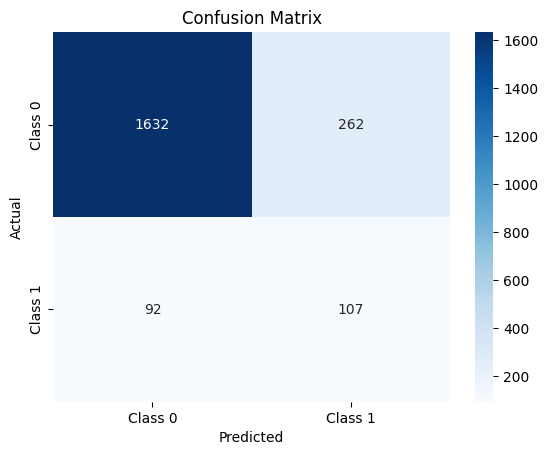

In [39]:
# Evaluate the model
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [46]:
# Examples of misclassified

if not isinstance(X_test, np.ndarray): X_test = X_test.to_numpy()
if not isinstance(y_test, np.ndarray): y_test = y_test.to_numpy()

fps = []
fns = []
for i in range(len(X_test)):
    if y_test[i] != y_pred[i]:
        if y_test[i] == 1:
            fns.append(X_test[i])
        else:
            fps.append(X_test[i])
print(f"Number of false positives: {len(fps)}")
print(f"Number of false negatives: {len(fns)}")
print()
for t in fns:
    print(t)
    print()

Number of false positives: 262
Number of false negatives: 92

"His present "" chambers "" may be quite humble , but Shiyani has the tiny space very neatly organized and clean . Many people pass him by but do not manage to see him , because the space is partially hidden behind trees , which gives him a relative privacy . "" There are many homeless sleeping around the station , "" Captain Xoli Mbele , from the nearby Johannesburg Central Police station said ."

Krueger recently harnessed that creativity to self-publish a book featuring the poems , artwork , photography and short stories of 16 ill or disabled artists from around the world . She hopes the book , which contains some of her own work as well , will show how talented disabled people can be .

We are alarmed to learn of your recently circulated proposals that would eviscerate the Lifeline program and leave many of the most vulnerable people in the country without access to affordable communications . As you are well aware , the